In [27]:
import json
import gzip
from pymongo import MongoClient
import pandas as pd
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

mongo_client = MongoClient()
verbose_mode_on = True

In [2]:
%run supporting_functions.ipynb

In [3]:
# parent_dir = "/Users/divyachoudhary/Documents/Work-ISI/RetweetNetwork"  # sys.argv[1]
# ## code to run once ##
database = "Nov19-test"  # sys.argv[2]
filename = "/Users/divyachoudhary/Documents/Work-ISI/RetweetNetwork/Tng_an_CVE_Twitter-mention.json.gz"
if not db_exists(database):
    create_db(database)
else:
    delete_db(database)
    create_db(database)
data = []
with gzip.GzipFile(filename, "r") as fp:
    for line in fp:
        data.append(json.loads(line))
db = mongo_client[database]["Twitter_CVE"]
db.insert_many(data)
# ## code to run once ##
# using the data and creating pandas data frame 
client = MongoClient()
database = client['Nov19-test']
collection = database.list_collection_names()
cve = database.Twitter_CVE
start = time.time()
mongo_json_twitter_cve=list(cve.find())
normalized = pd.io.json.json_normalize(mongo_json_twitter_cve)
end = time.time()
print("time taken", end - start)
twitter_cve_data = pd.DataFrame(normalized)

Database Nov19-test was dropped.
New database created, test collection added. 5e1cc209c471a261364a1e59
time taken 411.74075078964233


In [5]:
twitter_cve_data.head()

,_id,accessPlatform,content_language,content_type,coordinates,coordinates.coordinates,coordinates.type,country,country_code,created_at,...,user.screen_name_h,user.statuses_count,user.time_zone,user.translator_type,user.url_h,user.utc_offset,user.verified,user_id_h,username_h,withheld_in_countries
0,5e1cc22bc471a261364a1e5a,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",English,Tweet,NaN,NaN,NaN,NaN,NaN,Wed Aug 16 00:15:10 +0000 2017,...,ZEnDalSKR6WO2BPZDimZZA,377129,America/Los_Angeles,NaN,http://www.hightechnologyforensics.com,-25200.0,False,zOfdbmzmQ1fYGRWTuAFPZg,ZEnDalSKR6WO2BPZDimZZA,NaN
1,5e1cc22bc471a261364a1e5b,"<a href=""http://twibble.io"" rel=""nofollow"">Twi...",English,Tweet,NaN,NaN,NaN,NaN,NaN,Wed Sep 21 14:18:26 +0000 2016,...,5HklOzwf7b1Ptyfzt68xJA,30471,Eastern Time (US & Canada),NaN,http://blog.longo.org,-14400.0,False,bi-ts9pxCacRWJ5YElmqUQ,5HklOzwf7b1Ptyfzt68xJA,NaN
2,5e1cc22bc471a261364a1e5c,"<a href=""https://www.facebook.com/trickortips""...",English,Tweet,NaN,NaN,NaN,NaN,NaN,Thu May 25 14:01:13 +0000 2017,...,ZjJI3bOyiGX3rGKtO5W0pg,158080,None,NaN,,NaN,False,Ef81_7t2I_IIHeSNpVa6Fw,ZjJI3bOyiGX3rGKtO5W0pg,NaN
3,5e1cc22bc471a261364a1e5d,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",English,Tweet,NaN,NaN,NaN,NaN,NaN,Thu May 25 14:58:22 +0000 2017,...,EIh6ydnpaUCaPQzu1yma9Q,3215,Brasilia,NaN,http://osvaldohp.blogspot.com,-10800.0,False,6WXIP-PzLaCDPNk1T0TpLw,EIh6ydnpaUCaPQzu1yma9Q,NaN
4,5e1cc22bc471a261364a1e5e,"<a href=""http://www.twitter.com"" rel=""nofollow...",English,Tweet,NaN,NaN,NaN,NaN,NaN,Thu May 25 13:41:41 +0000 2017,...,IeKYrO3y1WbT59GX9P-_6Q,1043,Rome,NaN,,7200.0,False,Mr8ChT5pT9fZZIOuB9vRSA,IeKYrO3y1WbT59GX9P-_6Q,NaN


#### use this data now to generate the analysis

In [6]:
# df = get_selected_columns_for_df(twitter_cve_data)
list_of_rows = []
error_indices = []
for i in range(len(twitter_cve_data)):
    try:
        list_of_rows.append(list(get_tweet_features_per_row(twitter_cve_data.loc[i])))
    except ValueError as err:
        error_indices.append(i)
        print("there is value error at i = ", i)
        continue
df = pd.DataFrame(list_of_rows, columns=['user_id','user_screen_name','user_tz', 'user_statuses_count', 'user_location', 'user_listed_count', 'user_lang', 'user_friends_count', 'user_followers_count', 'user_following', 'user_favourites_count', 'user_description_m', 'user_created_at', 'id_str_h', 'lang', 'place', 'content_language', 'created_at', 'hashtags', 'tweet_has_media', 'symbols', 'tweet_has_symbol', 'user_mentions','tweet_has_user_mentions','extension_created_dow', 'extension_created_hod', 'retweeted_status_user_id_str_h', 'quoted_status_id_str_h', 'quoted_status_user_id_str_h', 'text_m', 'timestamp_ms', 'retweeted_status_text_m'])

there is value error at i =  87412


In [7]:
# Retweet related 
df['retweeted_status_user_id_str_h'] = df['retweeted_status_user_id_str_h'].fillna(value = 0)
df['retweet_flag'] = df.apply(lambda r: False if r['retweeted_status_user_id_str_h'] == 0 else True, axis = 1)
# Quoted Tweet related
df['quoted_status_id_str_h'] = df['quoted_status_id_str_h'].fillna(value = 0)
df['quoted_status_user_id_str_h'] = df['quoted_status_user_id_str_h'].fillna(value = 0)
df['quoted_status_flag'] = df.apply(lambda r: False if r['quoted_status_id_str_h'] == 0 else True, axis = 1)
print("final data frame created for the given collection with shape: {}".format(df.shape))

final data frame created for the given collection with shape: (259059, 34)


In [8]:
df = df.astype({'timestamp_ms': 'int'})
df = df.sort_values(by=['timestamp_ms'])

In [9]:
def get_preferred_user_for_user(data_to_use):
#     print("distinct preferred authors are:", list(set(data_to_use['retweeted_status_user_id_str_h'])))
    rows_of_data = []
    users_distinct = data_to_use[['user_id']].drop_duplicates()
    for user in users_distinct['user_id']:
        temp_df = data_to_use[data_to_use['user_id'] == user]
        retweets_of_user = temp_df[data_to_use['retweet_flag'] == True]
        if len(retweets_of_user) == 0:
            rows_of_data.append([user, []])
        else:
            distinct_preferred_authors = list(set(retweets_of_user['retweeted_status_user_id_str_h']))
            rows_of_data.append([user, distinct_preferred_authors])
    df_ret = pd.DataFrame(rows_of_data, columns=['user_id', 'preferred_authors_list'])
    return df_ret

def get_tweet_data_for_a_period(data, start_timestamp_ms, end_timestamp_ms):
    train_data = data[(data['timestamp_ms'] >= start_timestamp_ms) & (data['timestamp_ms'] <= end_timestamp_ms)]
    return train_data

def get_preferred_user_retweet_stats(twitter_data, start_time, end_time):
    pass

In [10]:
# 1st July to 31st July 2016
# data is from March 2016 to March 2018
start_time = 1467334801000
end_time = 1470013201000
train_data = get_tweet_data_for_a_period(df, start_time, end_time)
test_data = get_tweet_data_for_a_period(df, 1470013201000 ,1472691601000)
print(train_data.shape)
print(test_data.shape)

(5664, 34)
(7256, 34)


In [11]:
train_preferred_users_data = get_preferred_user_for_user(train_data)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [12]:
train_preferred_users_data.iloc[16]

user_id                                              FQcXC4SaV3eoNkIQDprs8Q
preferred_authors_list    [LnSDjetRDuZvHBs3yGOTJA, u_JZIiYTRFZ7SxZuC8Zcf...
Name: 16, dtype: object

In [13]:
len(set(test_data['user_id']).intersection(set(train_preferred_users_data['user_id'])))

638

#### for every user in test data count the number of retweets with retweet_user_id in preferred authors - do this only for the intersection of train test data in test data, for others in test data put frequency 0

In [14]:
len(test_data[['user_id']].drop_duplicates()['user_id'])

2652

In [15]:
test_users = test_data[['user_id']].drop_duplicates()['user_id']
test_train_intersect_retweet_activity_in_test = []
test_users_with_no_rewtweets_in_train = []
test_user_no_retweet = []
for user in test_users:
    test_retweet_data = test_data[(test_data['user_id'] == user) & (test_data['retweet_flag'] == True)]
#     print("retweets by user {} is {}".format(user, len(test_retweet_data)))
    if len(test_retweet_data) == 0:
        test_user_no_retweet.append(user)
    else:
        retweet_count_test = len(test_retweet_data)
        pref_authors_of_user = train_preferred_users_data[train_preferred_users_data['user_id'] == user]['preferred_authors_list'].tolist()
        if len(pref_authors_of_user) == 0:
            test_users_with_no_rewtweets_in_train.append([user, retweet_count_test])
            print("user had no retweets in the train period!")                                                
        else:
            pref_authors_of_user = pref_authors_of_user[0]
#             print("preferred users of user:", pref_authors_of_user)
            users_retweeted = set(test_retweet_data[['retweeted_status_user_id_str_h']]['retweeted_status_user_id_str_h'])
#             print("users retweeted by user:", users_retweeted)
            pref_users_retweeted = users_retweeted.intersection(set(pref_authors_of_user))
#             print("preferred users retweeted by user in test are :", pref_users_retweeted)
            if len(list(pref_users_retweeted)) == 0:
                test_train_intersect_retweet_activity_in_test.append([user, 0, retweet_count_test])
            else:
                test_retweets_of_intersection = test_retweet_data[test_retweet_data['retweeted_status_user_id_str_h'].isin(list(pref_users_retweeted))]
                preferred_auth_retweet_count = test_retweets_of_intersection.shape[0]
                test_train_intersect_retweet_activity_in_test.append([user, preferred_auth_retweet_count, retweet_count_test])
intersect_df = pd.DataFrame(test_train_intersect_retweet_activity_in_test, columns=['user_id', 'retweet_count_pref_auth', 'total_retweet_count'])
only_test_df = pd.DataFrame(test_users_with_no_rewtweets_in_train, columns=['user_id', 'total_retweet_count'])
    

user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train 

user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train 

user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train 

user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train 

user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train period!
user had no retweets in the train 

#### So the test data consists of three types of users:
1. Those test users who intersect with Train users and Retweet in the test period - 207
2. Those test users who DON'T intersect with Train users but DO Retweet in the test period - 892
3. Those test users who NEITHER intersect with Train users NOR Retweet in the test period - 1553

In [31]:
intersect_df.shape

(207, 3)

In [32]:
only_test_df.shape

(892, 2)

In [33]:
len(test_user_no_retweet)

1553

In [34]:
intersect_df.head()

,user_id,retweet_count_pref_auth,total_retweet_count
0,7G616igXZVRUVdTc4SLJEg,0,3
1,Wfi9Cx8xzaw0JCHN2SEdCg,1,2
2,JPVTnvRaVBb4D--OgYG_HQ,11,12
3,aYSRDe5FKjKy9gLZ0xXM2A,28,34
4,5KI_B2-cnLYhdbHxyFFnwA,0,1


In [35]:
test_retweet_pref_auth = intersect_df[intersect_df['retweet_count_pref_auth'] > 0]
test_retweet_pref_auth.head()

,user_id,retweet_count_pref_auth,total_retweet_count
1,Wfi9Cx8xzaw0JCHN2SEdCg,1,2
2,JPVTnvRaVBb4D--OgYG_HQ,11,12
3,aYSRDe5FKjKy9gLZ0xXM2A,28,34
5,jb3WhLLGfp84kc9_OEhrfw,1,1
6,yN8n7_8Qd1krAxXGlQg5dQ,2,7


In [36]:
test_retweet_pref_auth.shape

(84, 3)

#### So out of 207 test user and train user intersect who retweet in the test period ONLY 84 retweet their preferrred authors (estd from train period)

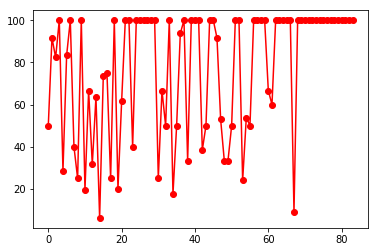

In [30]:
percent_pref_over_all = test_retweet_pref_auth['retweet_count_pref_auth']*100/test_retweet_pref_auth['total_retweet_count']
np.mean(percent_pref_over_all)
plt.plot(np.arange(len(percent_pref_over_all)), percent_pref_over_all, color='red', marker='o')



#### So of those 84 test users who retweet their preferred authors in the test period, they retweet their preferred authors 76.9% on an average.

In [37]:
hist, bin_edges = np.histogram(percent_pref_over_all)

Text(0, 0.5, '#users')

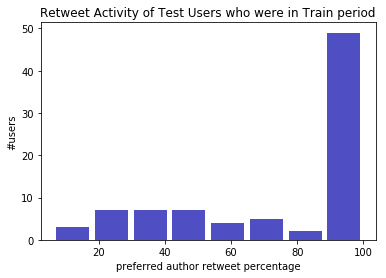

In [38]:
n, bins, patches = plt.hist(x=percent_pref_over_all, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.title('Retweet Activity of Test Users who were in Train period')
plt.xlabel('preferred author retweet percentage')
plt.ylabel('#users')

In [39]:
np.mean(percent_pref_over_all) 

76.59131080112688

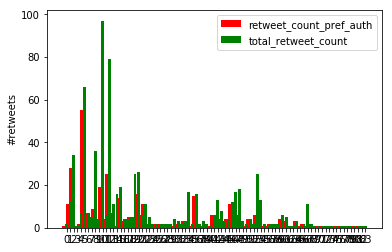

In [40]:
import numpy as np
import matplotlib.pyplot as plt

ind = np.arange(test_retweet_pref_auth.shape[0])  
width = .8

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, test_retweet_pref_auth['retweet_count_pref_auth'], width, color='r')
rects2 = ax.bar(ind+width, test_retweet_pref_auth['total_retweet_count'], width, color='g')

ax.set_ylabel('#retweets')
ax.set_xticks(ind+width)
ax.set_xticklabels(tuple(np.arange(intersect_df.shape[0])) )
ax.legend( (rects1[0], rects2[0]), ('retweet_count_pref_auth', 'total_retweet_count') )

# def autolabel(rects):
#     for rect in rects:
#         h = rect.get_height()
#         ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
#                 ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)

plt.show()

In [111]:
def find_retweet_freq_preferred_user(tweet_dataframe, train_start_ts_ms, window_num_days):
    train_end_ts_ms = train_start_ts_ms + window_num_days*86400000
    test_start_ts = train_end_ts_ms
    test_end_ts = (train_end_ts_ms + window_num_days*86400000)
    #print("test times", test_start_ts, test_end_ts)
    train_data = get_tweet_data_for_a_period(tweet_dataframe, train_start_ts_ms, train_end_ts_ms)
    test_data = get_tweet_data_for_a_period(tweet_dataframe, test_start_ts, test_end_ts)
    train_preferred_users_data = get_preferred_user_for_user(train_data)
    #print(train_preferred_authors.head())
    train_test_user_intersect = list(set(test_data['user_id']).intersection(train_preferred_users_data['user_id']))
    #print("len of intersection of train test :", len(train_test_user_intersect))
    test_users = test_data[['user_id']].drop_duplicates()['user_id']
#     print("test users", test_users)
    data_list = []
    for user in test_users:
    #     print("user is :", user)
        dd = test_data[test_data['user_id'] == user]
        tot_Tweet = dd.shape[0]
    #     print("tot_Tweet:", tot_Tweet)
        dd_RT = dd[dd['retweet_flag'] == True]
        tot_RT = dd_RT.shape[0]
    #     print("tot_RT:", tot_RT)
        if (user in train_test_user_intersect) and (dd_RT.shape[0] != 0):
    #         print("an intersect user")
            pref_authors = train_preferred_users_data[train_preferred_users_data['user_id'] == user]['preferred_authors_list']
            dd_sub = dd_RT[dd_RT['retweeted_status_user_id_str_h'] != 0]
    #         print("dd sub ", dd_sub)
            if dd_sub.shape[0] and len(pref_authors):
                num = len(set(dd_sub[['retweeted_status_user_id_str_h']]['retweeted_status_user_id_str_h']).intersection(set(list(pref_authors)[0])))
    #             print("pref auth RT:", num)
                data_list.append([user, num, tot_RT, tot_Tweet])
        else:
            data_list.append([user, 0, tot_RT, tot_Tweet])
    test_RT_freq = pd.DataFrame(data_list, columns = ['user_id', 'pref_auth_RT_freq', 'tot_RT_freq', 'tot_Tweet']) 
    return test_RT_freq
        
    

In [112]:
test_RT_freq = find_retweet_freq_preferred_user(df,1467334801000, 30)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [113]:
test_RT_freq.head(2)

,user_id,pref_auth_RT_freq,tot_RT_freq,tot_Tweet
0,CBTTj9CvxZibceOJ4fzqgw,2,2,3
1,F_97ZY08XOdiQt17GAq5RQ,1,1,1


In [114]:
max(test_RT_freq['tot_RT_freq'])

83

In [115]:
max(test_RT_freq['pref_auth_RT_freq'])

7